In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.shape

(18249, 14)

In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB



# Summary Statistics.

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1.The mean is more than median for all columns excep total bags.
2.There is large difference between 75 % and max of XLarge Bags Column.


## **Exploring Target Variable.**

In [13]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

As target variable has continuous values, so , this is a regression problem.

## **Data Visualizations.**

To check missing values.

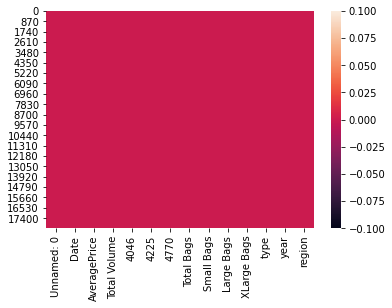

In [14]:

sns.heatmap(df.isnull())

The data has no missing values.

## **Univariate Analysis.**

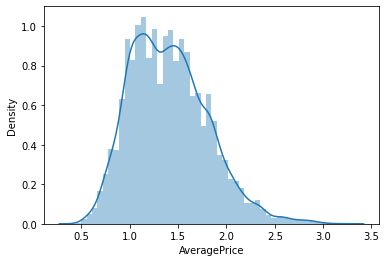

In [15]:
sns.distplot(df['AveragePrice'])

The average price of single avocado is majorly in the range of 1.0-1.7

## **Feature Engineering.**

In [26]:
df['Month'] = df['Date'].str.split("-").str[1]

In [27]:
df['Month'].value_counts().sort_index()

01    1944
02    1728
03    1836
04    1404
05    1512
06    1294
07    1512
08    1404
09    1296
10    1512
11    1404
12    1403
Name: Month, dtype: int64

In [28]:
df['Day'] = df['Date'].str.split("-").str[2]

In [29]:
df['Day'].value_counts().sort_index()

01    648
02    432
03    648
04    756
05    648
06    539
07    540
08    648
09    432
10    648
11    756
12    648
13    540
14    540
15    648
16    432
17    648
18    755
19    648
20    540
21    540
22    648
23    432
24    648
25    755
26    648
27    540
28    540
29    540
30    432
31    432
Name: Day, dtype: int64

## **Bivariate Analysis.**

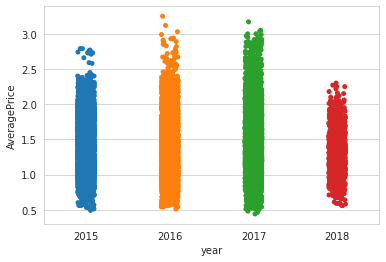

In [19]:
sns.set_style('whitegrid')
sns.stripplot(x='year',y='AveragePrice',data=df)

1.The average price of single avocado is least in the year 2018.
2.The average price of single avocado is highest in the year 2016.
3.The average price of single avocado is also high in the year 2017.

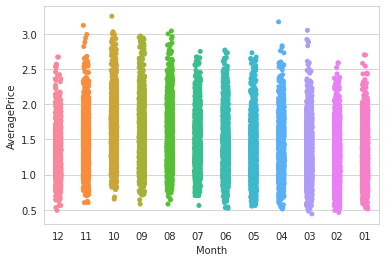

In [20]:
sns.set_style('whitegrid')
sns.stripplot(x='Month',y='AveragePrice',data=df)

1.The average price of single avocado is least in the month of February.
2.The average price of single avocado is highest in the month of October.
3.The average price of single avocado is also high in the month of March, April, August and November.

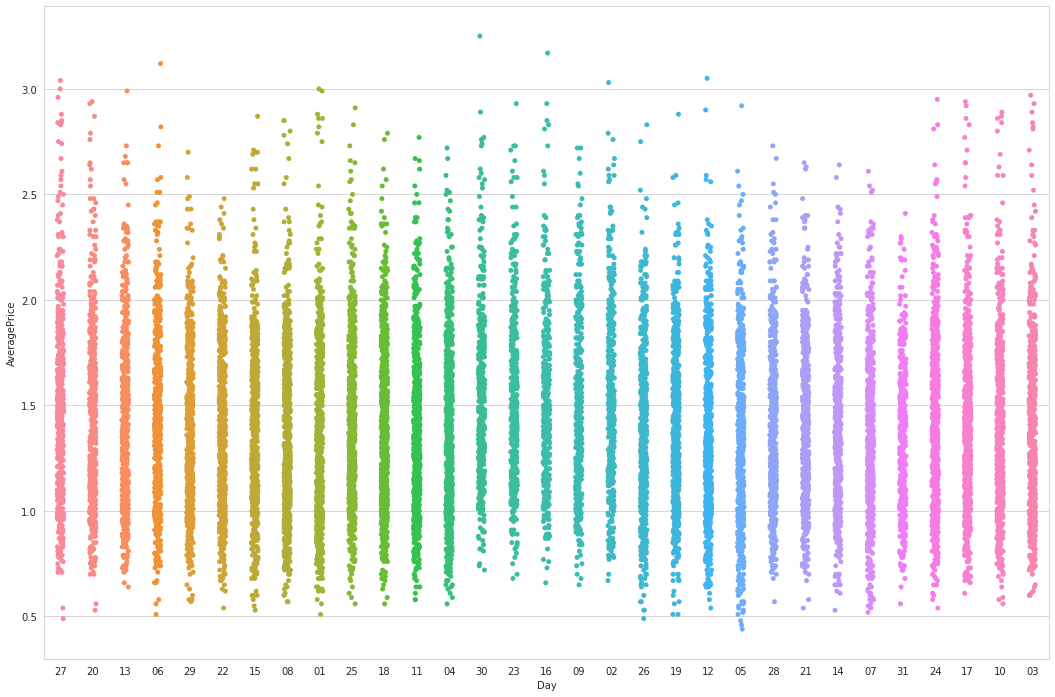

In [30]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Day',y='AveragePrice',data=df)

1.The average price of single avocado is least on the 31st of months.
2.The average price of single avocado is highest on the 30th of months.
3.The average price of single avocado is also high for the 27th, 16th, 12th, 6th, 2nd, 1st and 13th of months.

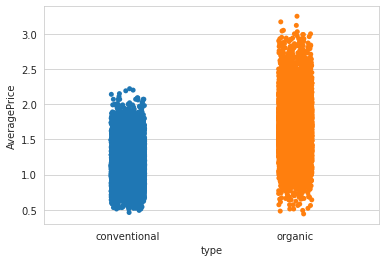

In [23]:
sns.set_style('whitegrid')
sns.stripplot(x='type',y='AveragePrice',data=df)

1.The average price of single organic avocado is higher than conventional avocado.
2.The average price of single organic avocado is in the range of 0.5-3.8 approximately.
3.The average price of single conventional avocado is in the range of 0.55-2.25 approximately.

## **Label Encoding.**

In [24]:
df_str_types=['region','type']

In [25]:
for value in df_str_types:
    a=(df[value].value_counts().sort_index())
    print(a)

Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
R

In [31]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts().sort_index())

0     338
1     338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
25    338
26    338
27    338
28    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
53    335
Name: region, dtype: int64
0    9126
1    9123
Name: type, dtype: int64


## **Bivariate Analysis.**

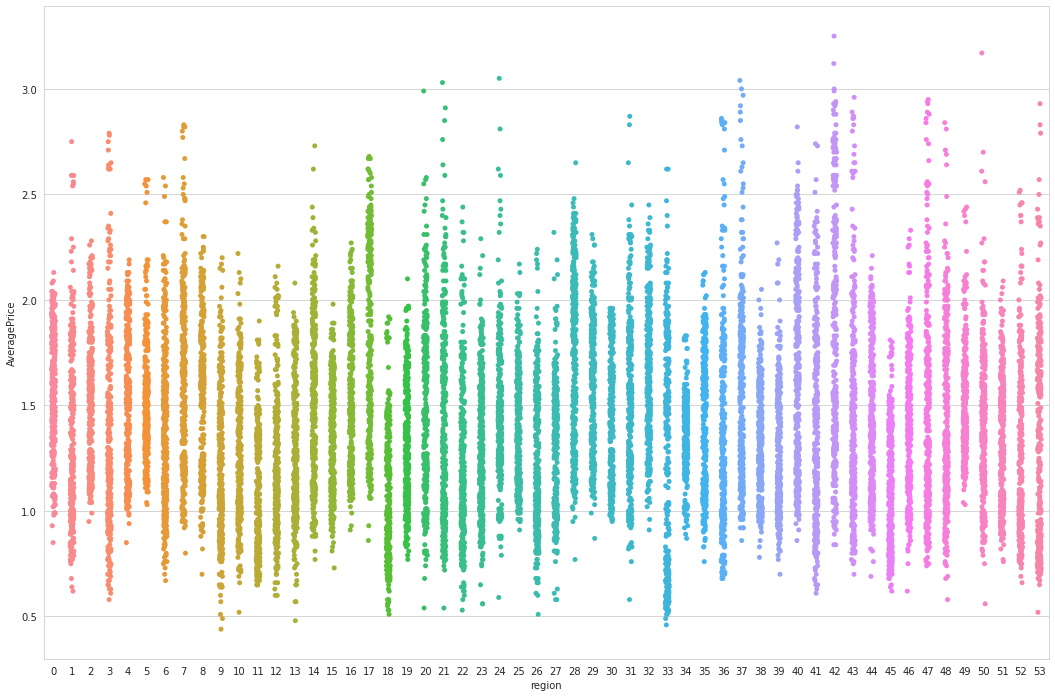

In [32]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='region',y='AveragePrice',data=df)

1.SanFrancisco has the highest average price of single avocado.
2.SouthCentral has the lowest average price of single avocado.
3.Pittsburgh, Houston, DallasFtWorth and GreatLakes also have low average price of single avocado.
4.Tampa, RaleighGreensboro, MiamiFtLauderdale and LasVegas also have high average price of single avocado.


In [33]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,06
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


## **Dropping of Columns.**

As the Unnamed: 0 column is only giving us the indexes , so we will drop that irrelevant column to avoid overfitting.As the year column is present in the dataset already, so we will drop the date,day and month column from dataset as per our requirement of developing the model.

In [34]:
df.drop(['Unnamed: 0','Date','Day','Month'],axis=1,inplace=True)

In [35]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [36]:
df.shape

(18249, 12)

In [37]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


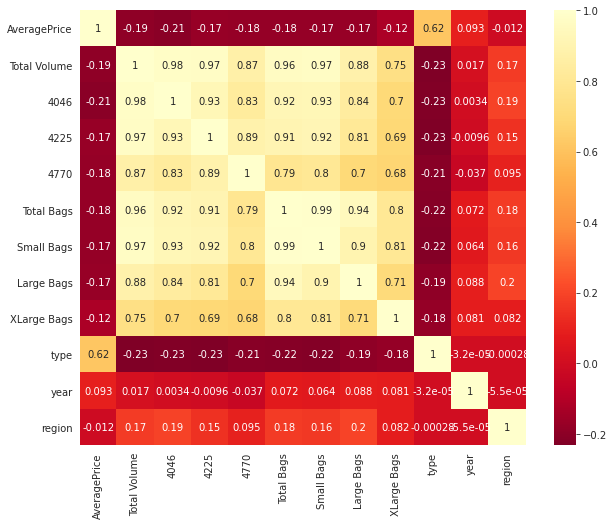

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

1.Average price is highly positively correlated to type.
2.type is highly negatively correlated to Total Volume.
3.Total Volume is highly positively correlated to 4046.
4.Total Volume is highly negatively correlated to 4046.

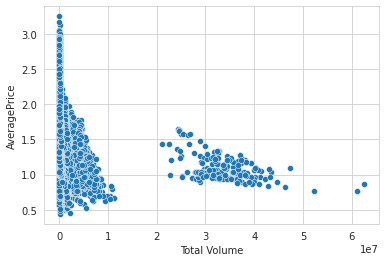

In [39]:
sns.scatterplot(x='Total Volume',y='AveragePrice',data=df)

Total volume of avocados sold is inversely proportional to the average price of a single avocado.

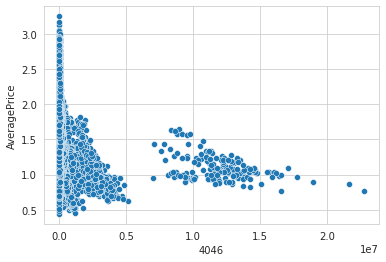

In [40]:
sns.scatterplot(x='4046',y='AveragePrice',data=df)

Total number of avocados with Product Lookup codes (PLU’s) 4046 sold is also inversely proportional to the average price of a single avocado.

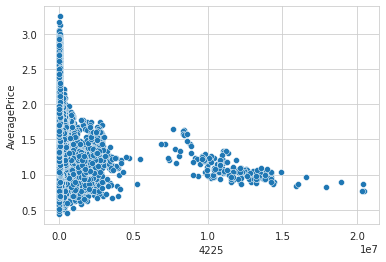

In [41]:
sns.scatterplot(x='4225',y='AveragePrice',data=df)

Total number of avocados with Product Lookup codes (PLU’s) 4225 sold is also inversely proportional to the average price of a single avocado.

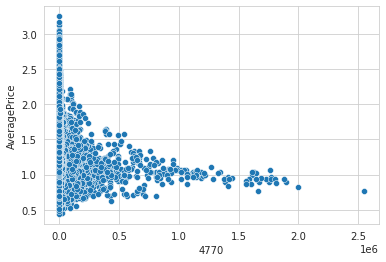

In [42]:
sns.scatterplot(x='4770',y='AveragePrice',data=df)

Total number of avocados with Product Lookup codes (PLU’s) 4770 sold is also inversely proportional to the average price of a single avocado.

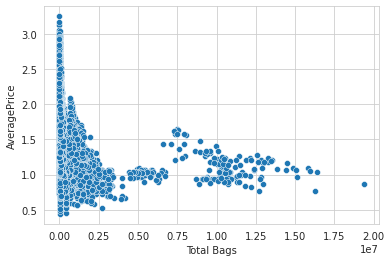

In [43]:
sns.scatterplot(x='Total Bags',y='AveragePrice',data=df)

Average price of a single avocado is also inversely proportional to total numbers of bags in which avocados are sold.

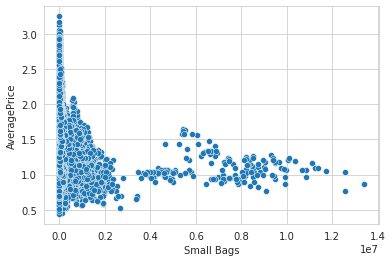

In [44]:
sns.scatterplot(x='Small Bags',y='AveragePrice',data=df)

Average price of a single avocado is also inversely proportional to total numbers of small bags in which avocados are sold.

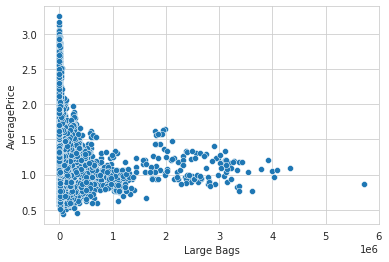

In [45]:
sns.scatterplot(x='Large Bags',y='AveragePrice',data=df)

Average price of a single avocado is also inversely proportional to total numbers of large bags in which avocados are sold.

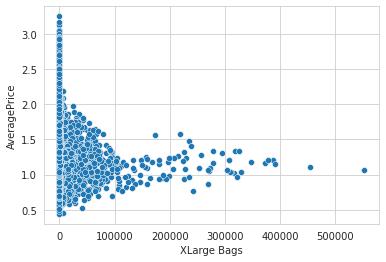

In [46]:
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=df)

Average price of a single avocado is also inversely proportional to total numbers Xlarge bags in which avocados are sold.

## **Plotting Outliers.**

AveragePrice        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Total Volume     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
4046             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
4225               AxesSubplot(0.125,0.518913;0.227941x0.16413)
4770            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Bags      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Large Bags      AxesSubplot(0.398529,0.321957;0.227941x0.16413)
XLarge Bags     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
type                  AxesSubplot(0.125,0.125;0.227941x0.16413)
year               AxesSubplot(0.398529,0.125;0.227941x0.16413)
region             AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

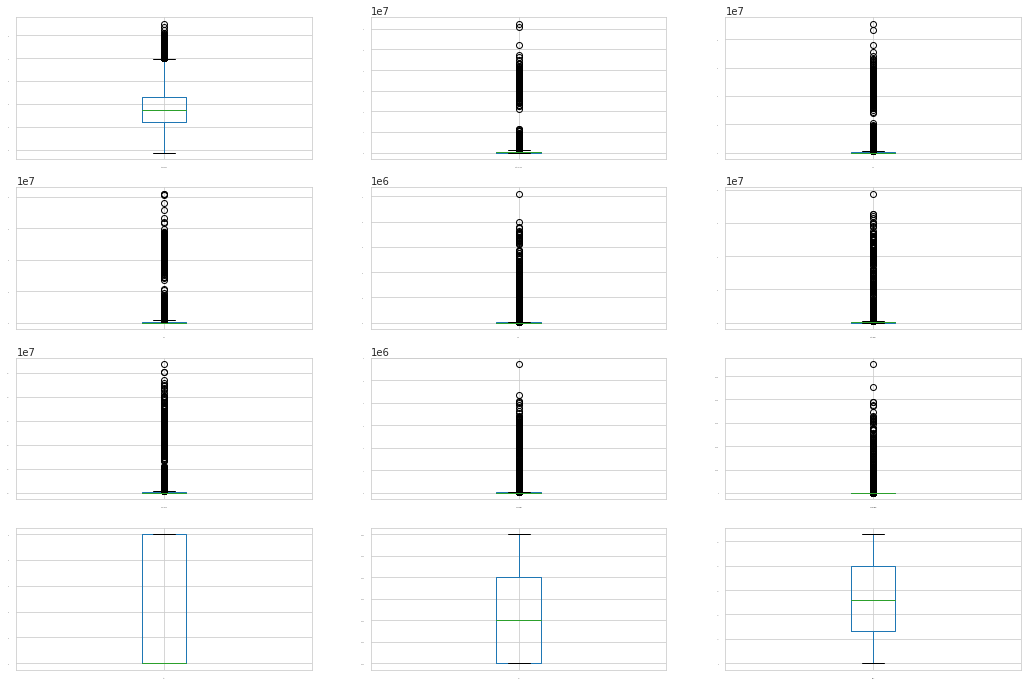

In [47]:
df.plot(kind='box',subplots=True,layout=(4,3),sharex=False,fontsize=1,figsize=(18,12))

All the columns have outliers except type, year and region.

## **Removing Outliers.**

In [48]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [50]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [51]:

df_new.shape

(17651, 12)

In [52]:
df.shape

(18249, 12)

In [53]:
# 598 rows are removed as outliers
((18249-17651)/18249)*100

3.276891884486821

In [54]:
df=df_new

In [55]:
df.shape

(17651, 12)

## **To check skewness.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ca68d3ed0>,
      dtype=object)

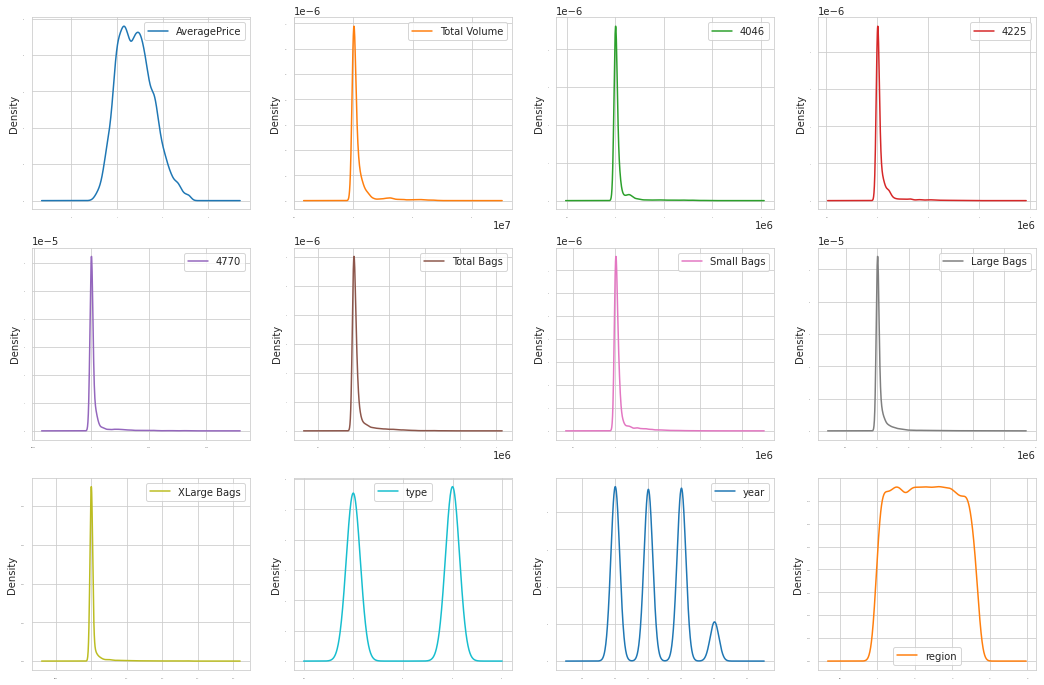

In [56]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags.

In [57]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Because the skewness of 4046, 4225, 4770, Small Bags, Large Bags and XLarge Bags is very high and therir corresponding aggregate column is also present in the dataset as columns of Total Bags and Total Volume. So, we will drop 4046, 4225, 4770, Small Bags, Large Bags and XLarge Bags from dataset.

## **Dropping of Columns.**

In [58]:
df.drop(['4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags'],axis=1,inplace=True)

In [59]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'type', 'year', 'region'], dtype='object')

## **Train Test Split.**

In [60]:
x=df[['Total Volume', 'Total Bags', 'type', 'year', 'region']]
y=df['AveragePrice']

## **Scaling.**

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [62]:
x=pd.DataFrame(x)

In [63]:
x.columns=['Total Volume', 'Total Bags', 'type', 'year', 'region']

## **Algorithms.**

In [64]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.3831377720833691
error:
Mean absolute error: 0.23664956894777064
Mean squared error: 0.0924911954010628
Root Mean squared error: 0.3041236514989632
0.39698206044512874
error:
Mean absolute error: 0.23634627674273628
Mean squared error: 0.09061030465276451
Root Mean squared error: 0.30101545583701267
0.4080831978056694
error:
Mean absolute error: 0.23348739572228064
Mean squared error: 0.08818695074179726
Root Mean squared error: 0.2969628777167228
0.39929598712945924
error:
Mean absolute error: 0.23180031624703282
Mean squared error: 0.08692271679121007
Root Mean squared error: 0.2948265876599498
0.3901344380636663
error:
Mean absolute error: 0.2371910022089885
Mean squared error: 0.09163074689475709
Root Mean squared error: 0.30270571004650226
0.4126214684446714
error:
Mean absolute error: 0.23234455884207697
Mean squared error: 0.08774059521547269
Root Mean squared error: 0.296210390120726
0.3974802821453547
error:
Mean absolute error: 0.2339342889801271
Mean squared error: 0.08973

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=84)
lm=LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
r2score=r2_score(y_test,predlm)
print(r2_score(y_test,predlm))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
mean_squared_error_lm=mean_squared_error(y_test,predlm)
print('Mean squared error:',mean_squared_error_lm)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.41673569956049994
error:
Mean absolute error: 0.2275283972706915
Mean squared error: 0.08437414772584366
Root Mean squared error: 0.44901436820828755


In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
mean_squared_error_dtr=mean_squared_error(y_test,preddtr)
print('Mean squared error:',mean_squared_error_dtr)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.6455826322293723
error:
Mean absolute error: 0.1512796086508754
Mean squared error: 0.05126949021627188
Root Mean squared error: 0.2264276710481117


In [67]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
mean_squared_error_knn=mean_squared_error(y_test,predknn)
print('Mean squared error:',mean_squared_error_knn)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.817357079151344
error:
Mean absolute error: 0.11379351184346034
Mean squared error: 0.026420853759011324
Root Mean squared error: 0.16254492843214557


In [68]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
mean_squared_error_svr=mean_squared_error(y_test,predsvr)
print('Mean squared error:',mean_squared_error_svr)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

0.5152831130748456
error:
Mean absolute error: 0.1995734347633484
Mean squared error: 0.07011842520074858
Root Mean squared error: 0.26479883912273594


In [69]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [70]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.4167205519667099
error:
Mean absolute error: 0.22753215570075735
Mean squared error: 0.08437633895427162
Mean squared error: 0.08437633895427162
Root Mean squared error: 0.2904760557331217


In [71]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.4167356994063951
error:
Mean absolute error: 0.22752839730811295
Mean squared error: 0.08437414774813623
Root Mean squared error: 0.2904722839586184


In [72]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
r2score=r2_score(y_test,predel)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predel))
mean_squared_error_el=mean_squared_error(y_test,predel)
print('Mean squared error:',mean_squared_error_el)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predel)))

0.4167205519667099
error:
Mean absolute error: 0.22753022552644
Mean squared error: 0.08437537354183956
Root Mean squared error: 0.2904743939520996


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8143628192049626
error:
Mean absolute error: 0.11630538105046344
Mean squared error: 0.026853998957260553
Root Mean squared error: 0.163871898009575


In [74]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
print(r2_score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
mean_squared_error_ad=mean_squared_error(y_test,predad)
print('Mean squared error:',mean_squared_error_ad)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))

0.4728863976116434
error:
Mean absolute error: 0.22028100874591555
Mean squared error: 0.07625147111301736
Root Mean squared error: 0.27613668918312423


K - Neighbors Regressor is the best algorithm.

## **Cross Validation Score.**

In [75]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)

[-0.33782941  0.10868162  0.13577791 -0.08329639 -0.21264309]


In [76]:
# Fix the sign
scoresknn=(knnscores)**2

In [77]:
scoresknn

array([0.11412871, 0.01181169, 0.01843564, 0.00693829, 0.04521708])

In [78]:
print(scoresknn.mean(),scoresknn.std())

0.039306283256445106 0.03968011163361294


In [79]:
list1=[0.817357079151344]
list2=[0.039306283256445106]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)

In [80]:
print(difference)

[0.7780507958948989]


As the difference between accuracy scores and cross validation scores of K-neighbors Regressor is only 7%. So, It is verified that K-neighbors Regressor is the best algorithm for this model with accuracy of 81.735%.

## **Hyper Parameter Tuning.**

In [84]:
knn=KNeighborsRegressor(n_neighbors=5,algorithm='auto',weights='uniform',leaf_size=30,p=1)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
mean_squared_error_knn=mean_squared_error(y_test,predknn)
print('Mean squared error:',mean_squared_error_knn)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.8205345043147054
error:
Mean absolute error: 0.11294284243048403
Mean squared error: 0.02596121215242018
Root Mean squared error: 0.16112483406483366


## **Saving the model.**

In [85]:
import joblib

In [86]:
joblib.dump(knn,"knn_avocado.obj")

['knn_avocado.obj']